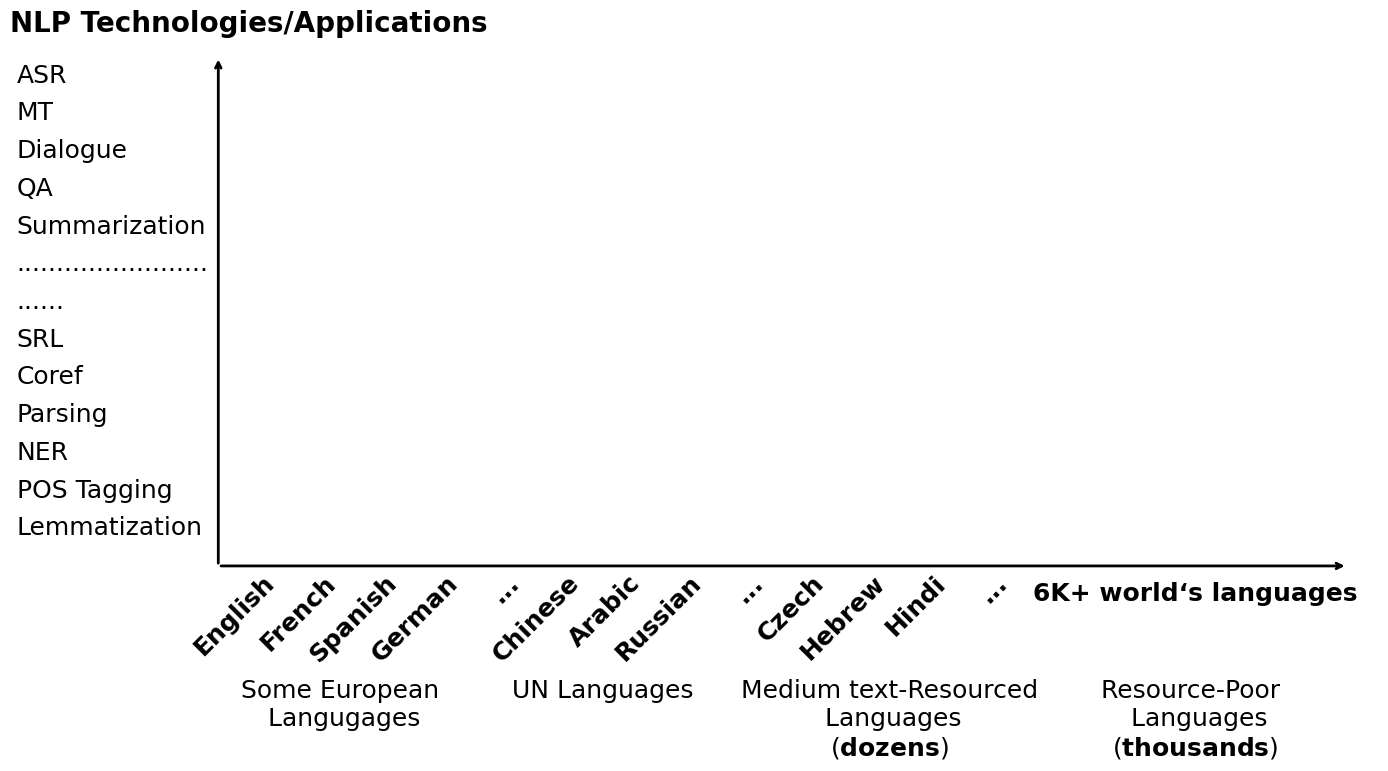

In [74]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 设置画布大小
fig, ax = plt.subplots(figsize=(14, 8))

# 定义标签
x_labels = ["English", "French", "Spanish", "German", "...", "Chinese", "Arabic", "Russian", "...",
            "Czech", "Hebrew", "Hindi", "...", "", "", "6K+ world‘s languages", "", ""] # , "", ""
y_labels = ['Lemmatization', 'POS Tagging', 'NER', 'Parsing', 'Coref', 'SRL', '......', '........................',#'---------------------',
            'Summarization', 'QA', 'Dialogue', 'MT', 'ASR']

# 设置坐标轴范围
ax.set_xlim(-1, len(x_labels))
ax.set_ylim(-1, len(y_labels))

tsize = 18
ysize = tsize + 2 

# 设置刻度位置
ax.set_xticks(range(len(x_labels)))
ax.set_yticks(range(len(y_labels)))

# 设置刻度标签并放大字体
ax.set_xticklabels(x_labels, fontsize=tsize, fontweight='bold')
ax.set_yticklabels([''] * len(y_labels))  # 清空默认标签，手动绘制

# 自定义 X 轴标签旋转方式
for i, label in enumerate(ax.get_xticklabels()):
    if x_labels[i] == "6K+ world‘s languages":
        label.set_rotation(0)
        label.set_ha('center')
        label.set_va('top')
        label.set_y(-0.02)
    else:
        label.set_rotation(45)
        label.set_ha('right')

# 手动绘制 Y 轴标签，左对齐并显示在 Y 轴左边，字体放大
for i, text in enumerate(y_labels):
    ax.text(-4.3, i, text, va='center', ha='left', fontsize=tsize)

# 隐藏边框和刻度线
ax.tick_params(axis='both', which='both', length=0)
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加箭头：从原点出发
arrow_style = dict(arrowstyle='->', lw=2)
ax.annotate('', xy=(len(x_labels)-0.5, -1), xytext=(-1, -1), arrowprops=arrow_style)  # X轴箭头
ax.annotate('', xy=(-1, len(y_labels)-0.5), xytext=(-1, -1), arrowprops=arrow_style)  # Y轴箭头

# 添加Y轴legend文字（rotation = 0，显示在箭头上方）
ax.text(-0.5, len(y_labels), 'NLP Technologies/Applications',
        rotation=0, va='bottom', ha='center', fontsize=ysize, fontweight='bold')

# 添加横向大括号和分组标签
bracket_groups = [(0, 4), (5, 8), (9, 12), (13, 18)]
bracket_labels = [
    'Some European\n Langugages',
    'UN Languages',
    #'Medium-Resourced \n Languages \n(dozens)',
    "Medium text-Resourced\n Languages\n"+r"$\mathrm{(\mathbf{dozens})}$",
    'Resource-Poor \n Languages\n'+r"$\mathrm{(\mathbf{thousands})}$"
]


for i, (start, end) in enumerate(bracket_groups):
    if i == 0:
        x_center = (start + end) / 2 - 1.
    elif i == 1:
        x_center = (start + end) / 2 - 1.2
    elif i == 2:
        x_center = (start + end) / 2 - 0.5
    else:
        x_center = (start + end) / 2 - 0.5
    y_bracket = -2.5
    y_label = -4
    # 模拟横向大括号（折线）
    ax.plot([start, start, end, end], [y_bracket, y_bracket-0.3, y_bracket-0.3, y_bracket], 
            color='black', lw=1.5)
    # 添加分组标签
    ax.text(x_center, y_label, bracket_labels[i], ha='center', va='top', 
            fontsize=tsize)

plt.tight_layout()
plt.show()


In [ ]:
# NLTK POS tagging
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def nltk_pos_tag(text):
    # 分词
    tokens = word_tokenize(text)
    # 词性标注
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

text = "This is a simple sentence"
text = "Natural Language Processing"

nltk_result = nltk_pos_tag(text)
print("NLTK pos results::")
for word, tag in nltk_result:
    print(f"{word}: {tag}")

In [ ]:
# spaCy POS tagging
import spacy

# 加载英文模型（首次运行需要下载，使用命令: python -m spacy download en_core_web_sm）
nlp = spacy.load("en_core_web_sm")

def spacy_pos_tag(text):
    doc = nlp(text)
    # 提取单词和词性
    pos_tags = [(token.text, token.pos_, token.tag_) for token in doc]
    return pos_tags

spacy_result = spacy_pos_tag(text)
print("\nspaCy词性标注结果:")
print("(单词: 通用词性, 详细词性标签)")
for word, pos, tag in spacy_result:
    print(f"{word}: {pos}, {tag}")